In [1]:
# test example for linear classification (from the book 'Machine Learning - A Gentle Introduction')
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [2]:
who

datasets	 np	 plt	 preprocessing	 sk	 train_test_split	 


In [3]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [4]:
X = X_iris[:,:2]
y = y_iris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

# Standardise = (Original - mean) / std

/Users/calvincheung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


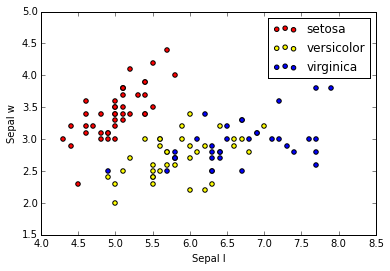

In [5]:
colors = ['red','yellow','blue']
for i in range(len(colors)):
        xs = X_train[:,0][y_train == i] # column of X_train that filtered by y_train
        ys = X_train[:,1][y_train == i]
        plt.scatter(xs,ys, c=colors[i])
        plt.legend(iris.target_names)
        plt.xlabel('Sepal l')
        plt.ylabel('Sepal w')

In [6]:
# Linear classifier 
from sklearn.linear_model import SGDClassifier
# sklearn._model
clf = SGDClassifier()
clf.fit(X_train2,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [7]:
print(clf.coef_, clf.intercept_)

[[-29.30766265  12.3553701 ]
 [ -5.21734957 -12.21001281]
 [  7.21378436   9.64203392]] [-18.73902949  -2.87541435 -16.7024992 ]


/Users/calvincheung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


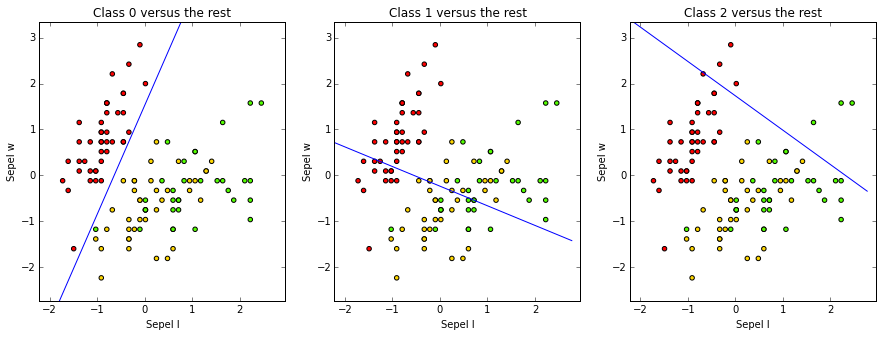

In [8]:
# model testing
x_min = X_train2[:,0].min() - 0.5
x_max = X_train2[:,0].max() + 0.5
y_min = X_train2[:,1].min() - 0.5
y_max = X_train2[:,1].max() + 0.5

xs = np.arange(x_min,x_max,0.5)
#fig, axes = plt.subplots(1,3)
#fig.set_size_inches(10,6)
plt.figure(figsize=(15,5))
for i in range(0,3):
    plt.subplot(1,3,i+1)

#    axes[i].set_aspect('equal')
    plt.title('Class ' + str(i) + ' versus the rest' )
    plt.xlabel('Sepel l')
    plt.ylabel('Sepel w')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    #sca(axes[i])
    plt.scatter(X_train2[:,0], X_train2[:,1], c = y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
    plt.plot(xs, ys, hold = True)

In [9]:
# Use the classifier to predict class
print(clf.predict(scaler.transform([[4.7, 3.1]])))
print(clf.decision_function(scaler.transform([[4.7,3.1]])))

[0]
[[ 19.34062917   2.54295518 -24.87785413]]


In [10]:
# evaluate the efficiency of the classifier
from sklearn import metrics
y_train_pred = clf.predict(X_train2)
print(metrics.accuracy_score(y_train, y_train_pred))
# as in percentage

0.803571428571


In [11]:
y_pred = clf.predict(X_test2)
print(metrics.accuracy_score(y_test, y_pred))

0.631578947368
